In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_excel('C:\\Users\\onik1\\Downloads\\summer_camp_data1.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52724 entries, 0 to 52723
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                52724 non-null  datetime64[ns]
 1   source              52724 non-null  object        
 2   medium              52724 non-null  object        
 3   delivery_available  52724 non-null  object        
 4   device_type         52724 non-null  object        
 5   promo_activated     52724 non-null  object        
 6   filter_used         52724 non-null  object        
 7   pageviews           52724 non-null  int64         
 8   visits              52724 non-null  int64         
 9   productClick        52724 non-null  int64         
 10  addToCart           52724 non-null  int64         
 11  checkout            52724 non-null  int64         
 12  transactions        52724 non-null  int64         
 13  revenue             52724 non-null  float64   

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0


In [3]:
data.groupby('source')['revenue'].sum().sort_values(ascending=False)

source
yandex           4.674748e+08
google           4.565170e+08
(direct)         2.384474e+08
admitad          6.573886e+07
eLama            1.643239e+07
cityads          1.429077e+07
promo            5.363685e+06
co-promo         3.347826e+06
newsletter       2.225289e+06
other            1.839654e+06
DuckDuckGo       9.214030e+05
vk               6.176850e+05
actionpay        5.557170e+05
bing             4.727260e+05
advertise        4.404360e+05
mytarget         4.136530e+05
opmcpa           3.938250e+05
facebook         2.940910e+05
instagram        1.527800e+04
yandex_direct    1.296000e+04
sailplay         1.294100e+04
exponea          8.804000e+03
baidu            0.000000e+00
youtube          0.000000e+00
Name: revenue, dtype: float64

In [4]:
data.groupby('device_type')['revenue'].sum().sort_values(ascending=False)

device_type
Мобайл           5.855571e+08
Десктоп          5.385228e+08
Не определено    1.517573e+08
Name: revenue, dtype: float64

In [5]:
data1 = pd.read_excel('C:\\Users\\onik1\\Downloads\\summer_camp_data1.xlsx', parse_dates=[0], index_col=[0])
data1 = data1.sort_index()
data1.head()

,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
date,,,,,,,,,,,,,
2020-01-01,google,organic,Не определено,Десктоп,yes,no,2236,317,5530,1106,793,143,166778.0
2020-01-01,yandex,cpc,Доставка есть,Десктоп,no,yes,25,2,60,12,10,2,1444.0
2020-01-01,advertise,cpa,Не определено,Десктоп,yes,no,351,60,440,88,54,10,11619.0
2020-01-01,google,organic,Доставки нет,Десктоп,no,no,13,1,20,4,3,1,882.0
2020-01-01,advertise,cpa,Доставка есть,Мобайл,yes,no,10,2,20,4,9,1,1158.0


In [6]:
data_cpc = data1.query('medium == "cpc"').resample('1D').sum()
data_cpc.head()

,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
date,,,,,,,
2020-01-01,23150,7918,55820,11156,7510,1095,1278862.0
2020-01-02,31038,10538,73110,14610,9808,1509,1774136.0
2020-01-03,31247,10537,74220,14830,9862,1564,1889112.0
2020-01-04,33648,11265,81390,16264,10428,1702,2072428.0
2020-01-05,33475,11149,79590,15908,10609,1703,2061834.0


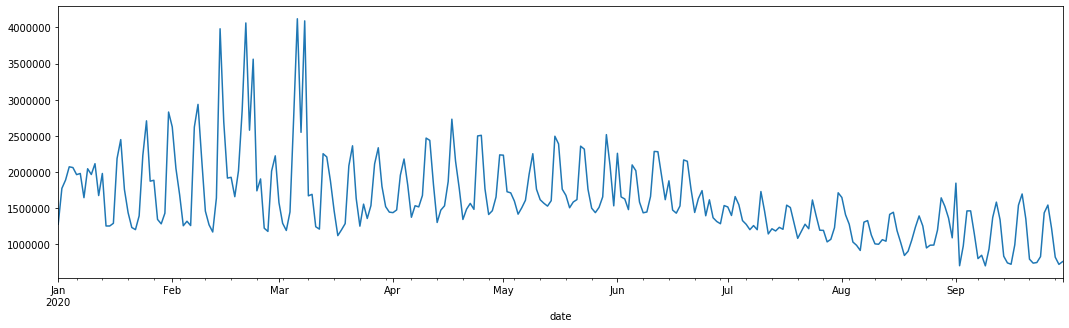

In [7]:
data_cpc['revenue'].plot(figsize=(18, 5))

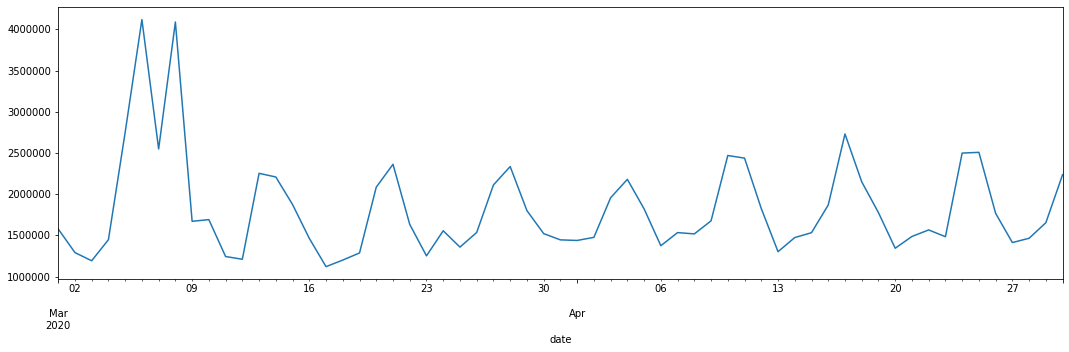

In [8]:
data_cpc['revenue']['2020-03':'2020-04'].plot(figsize=(18, 5))

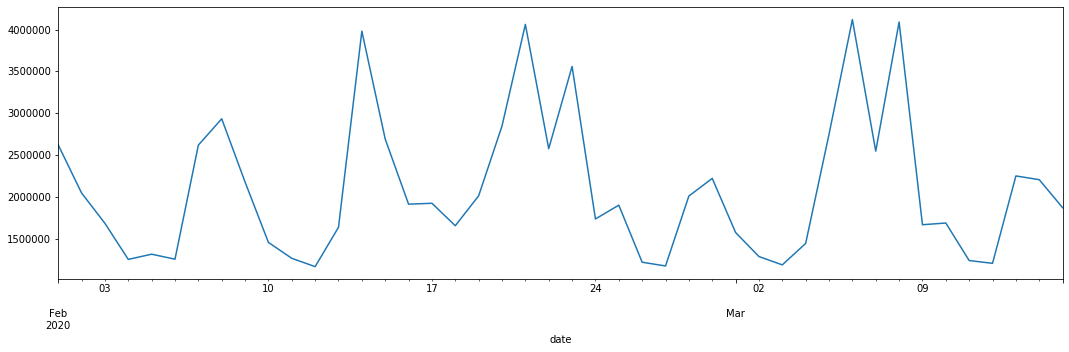

In [9]:
data_cpc['revenue']['2020-02':'2020-03-15'].plot(figsize=(18, 5))

Возьмем дату начала ограничительных мер 30 марта 2020 года на основании сайта

https://riamo.ru/article/438032/hronologiya-karantina-kak-vvodilis-i-snimalis-ogranicheniya-v-moskovskom-regione.xl

In [10]:
print('Средний размер чека транзакции до введения ограничений: {:.2f}'.format(data1[:'2020-03-29']['revenue'].mean()))
print('Средний размер чека транзакции после введения ограничений: {:.2f}'.format(data1['2020-03-30':]['revenue'].mean()))

Средний размер чека транзакции до введения ограничений: 27750.17
Средний размер чека транзакции после введения ограничений: 22651.12


In [11]:
print('Средний размер чека транзакции с использованием промокода до введения ограничений: {:.2f}'
      .format(data1.query('promo_activated == "yes"')[:'2020-03-29']['revenue'].mean()))
print('Средний размер чека транзакции с использованием промокода после введения ограничений: {:.2f}'
      .format(data1.query('promo_activated == "yes"')['2020-03-30':]['revenue'].mean()))

Средний размер чека транзакции с использованием промокода до введения ограничений: 30041.13
Средний размер чека транзакции с использованием промокода после введения ограничений: 24807.17


In [12]:
print('Средний размер чека транзакции без использования промокода до введения ограничений: {:.2f}'
      .format(data1.query('promo_activated == "no"')[:'2020-03-29']['revenue'].mean()))
print('Средний размер чека транзакции без использования промокода после введения ограничений: {:.2f}'
      .format(data1.query('promo_activated == "no"')['2020-03-30':]['revenue'].mean()))

Средний размер чека транзакции без использования промокода до введения ограничений: 25794.45
Средний размер чека транзакции без использования промокода после введения ограничений: 20622.12


### Проверка гипотез:
    Н0, коэффициент конверсии в выходные и будние дни одинаковый;
    Н1, коэффициент конверсии в выходные и будние дни разный.
    
Подготовим данные

In [13]:
data_cr = data1.resample('1D').sum()
data_cr['dayofweek'] = data_cr.index.dayofweek
data_cr.head()

,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,dayofweek
date,,,,,,,,
2020-01-01,62709,21736,131780,26354,18920,3107,3528167.0,2
2020-01-02,80623,27774,170190,34018,24013,4208,4867543.0,3
2020-01-03,81987,28168,172520,34476,23881,4260,4978608.0,4
2020-01-04,85679,29164,186350,37240,24949,4549,5338299.0,5
2020-01-05,83842,28360,180290,36026,24861,4498,5300997.0,6


In [14]:
# CR = сделавшие транзакацию / всего посетителей * 100
data_cr['cr'] = data_cr['transactions'] / data_cr['visits'] * 100
data_cr.reset_index(inplace=True)
data_cr.head()

,date,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,dayofweek,cr
0,2020-01-01,62709,21736,131780,26354,18920,3107,3528167.0,2,14.294258
1,2020-01-02,80623,27774,170190,34018,24013,4208,4867543.0,3,15.150861
2,2020-01-03,81987,28168,172520,34476,23881,4260,4978608.0,4,15.123544
3,2020-01-04,85679,29164,186350,37240,24949,4549,5338299.0,5,15.597998
4,2020-01-05,83842,28360,180290,36026,24861,4498,5300997.0,6,15.860367


С помощью теста Шапиро-Уилка проверим генеральную совокупность на нормальность.

In [15]:
stat, p = st.shapiro(data_cr['cr']) # тест Шапиро-Уилка на нормальность
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('Отклонить гипотезу о нормальности')
else:
    print('Принять гипотезу о нормальности')

Statistics=0.997, p-value=0.858
Принять гипотезу о нормальности


In [16]:
data_cr_weekday = data_cr.query('dayofweek != (5, 6)')
data_cr_holidays = data_cr.query('dayofweek == (5, 6)')

In [17]:
# проверка на равенство дисперсий
test_leven, p = st.levene(data_cr_weekday['cr'], data_cr_holidays['cr'])
print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
alpha = 0.05
if p < alpha:
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

Statistics=6.238, p-value=0.013
Отклонить гипотезу о равенстве дисперсий


In [18]:
alpha = .05

results = st.ttest_ind(
    data_cr_weekday['cr'], 
    data_cr_holidays['cr'],
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.0249861684812265e-25
Отвергаем нулевую гипотезу


С уверенностью в 95% мы можем сказать, что CR в выходные и будние дни отличаются.